# `6_summary.ipynb`

In this notebook results from all previous notebooks are shown and compared.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from common import read_results

In [3]:
results = pd.read_csv("results.csv")

## `results.csv`

There are all the times we got in the different benchmarks sorted from slowest to fastest.

In [4]:
results

,timestamp,hostname,test,timeit_avg,timeit_std
0,2023-08-26 17:16:28.518379,nid06343,list_pointwise,8.210000,8.510000e-03
1,2023-08-26 17:22:33.012298,nid06343,list_sin_pointwise,14.500000,2.910000e-02
2,2023-08-26 17:23:40.702632,nid06343,array_pointwise,15.100000,7.570000e-03
3,2023-08-26 17:29:25.304445,nid06343,array_sin_pointwise,22.600000,5.140000e-02
4,2023-08-26 17:29:28.692230,nid06343,numpy_pointwise,0.000036,5.170000e-07
5,2023-08-26 17:29:35.943303,nid06343,numpy_sin_pointwise,0.875000,7.880000e-03
6,2023-08-26 17:32:45.917669,nid06343,list_1D_same_col_ZYX,14.900000,3.840000e-03
7,2023-08-26 17:35:29.327149,nid06343,numpy_1D_same_col,0.113000,5.310000e-04
8,2023-08-26 17:40:40.493204,nid06343,list_1D_same_row_ZXY,14.900000,1.360000e-02
9,2023-08-26 17:41:42.083038,nid06343,numpy_1D_same_row,0.099800,1.710000e-05


## Summary plots

In [5]:
def comparison_plot(test_names, times_avg, title=None):
    assert len(test_names) == len(times_avg)
    assert isinstance(title, str)

    fig, ax = plt.subplots(figsize=(7, 5), dpi=100)

    y_pos = np.arange(len(test_names))

    ax.barh(y_pos, times_avg, align='center')
    ax.set_yticks(y_pos, labels=test_names)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Times (s)')
    ax.set_xscale('log')
    ax.set_title(title)

### Pointwise copy stencil

In [6]:
test_names = [
    "list_pointwise", "array_pointwise", "numpy_pointwise", "numba_pointwise",
    "numba_parallel_pointwise", "numexpr_pointwise", "gt4py_numpy_pointwise",
    "gt4py_ifirst_pointwise", "gt4py_kfirst_pointwise"
]
times_avg = [read_results(test) for test in test_names]

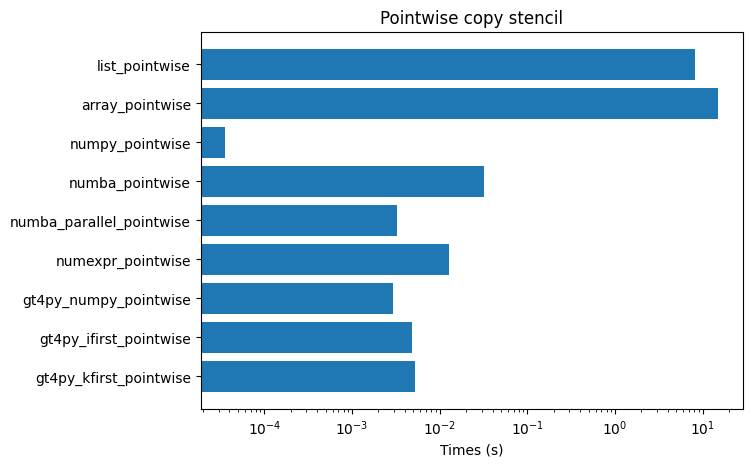

In [7]:
comparison_plot(test_names, times_avg, title="Pointwise copy stencil")

### Pointwise sine stencil

In [8]:
test_names = [
    "list_sin_pointwise", "array_sin_pointwise", "numpy_sin_pointwise", "numba_sin_pointwise",
    "numba_parallel_sin_pointwise", "numexpr_sin_pointwise"
]
times_avg = [read_results(test) for test in test_names]

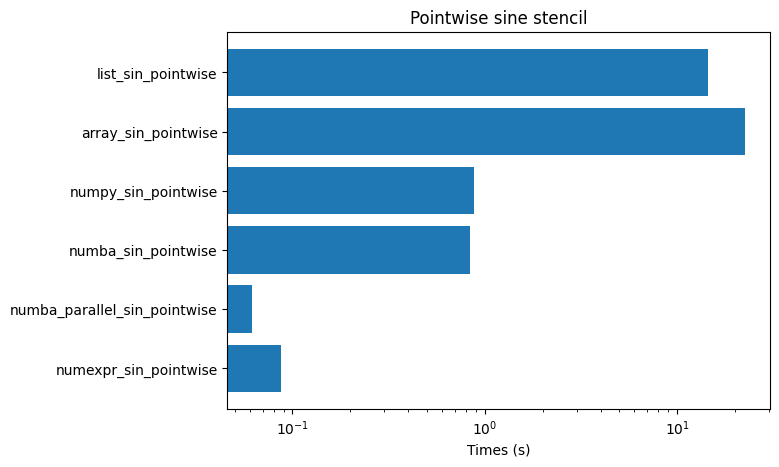

In [9]:
comparison_plot(test_names, times_avg, title="Pointwise sine stencil")

### 1D stencil

In [10]:
test_names = [
    "list_1D_same_col_ZYX", "numpy_1D_same_col", "numba_1D_same_col", "numexpr_1D_same_col",
    "gt4py_numpy_1D_same_col", "gt4py_ifirst_1D_same_col", "gt4py_kfirst_1D_same_col"
]
times_avg = [read_results(test) for test in test_names]

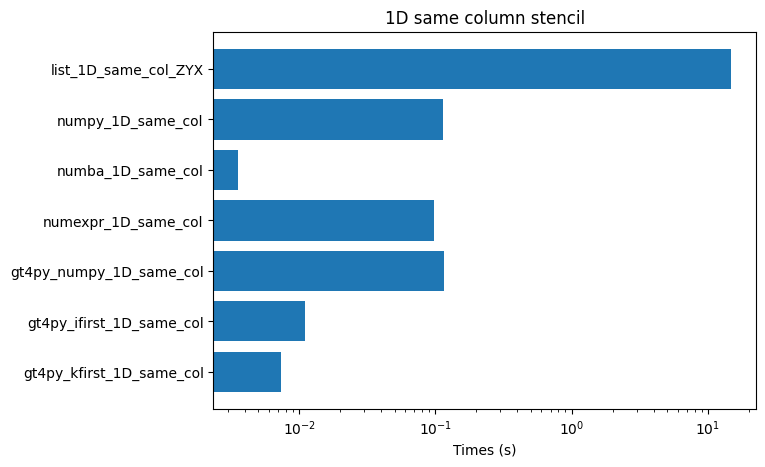

In [11]:
comparison_plot(test_names, times_avg, title="1D same column stencil")

### 2D stencil

In [12]:
test_names = [
    "numpy_2D", "numba_2D", "numba_1D_same_col", "gt4py_numpy_2D",
    "gt4py_ifirst_2D", "gt4py_kfirst_2D"
]
times_avg = [read_results(test) for test in test_names]

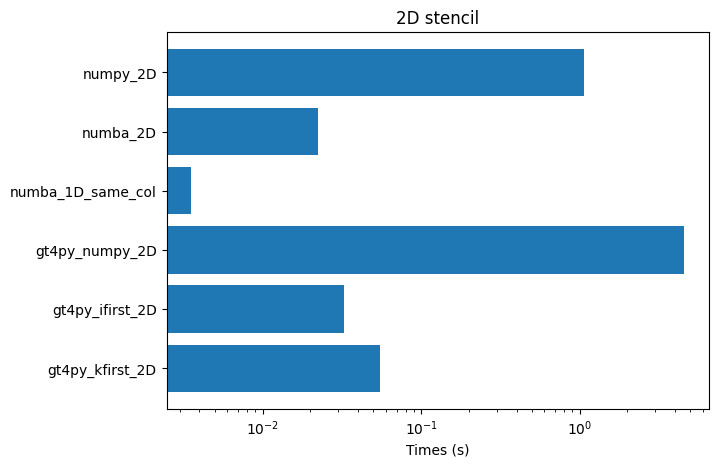

In [13]:
comparison_plot(test_names, times_avg, title="2D stencil")